In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("emissions.csv")
df2 = df[["project_name", "cpu_energy", "ram_energy"]]

In [4]:
df2 = df2.set_index("project_name")

Text(0.5, 0, '')

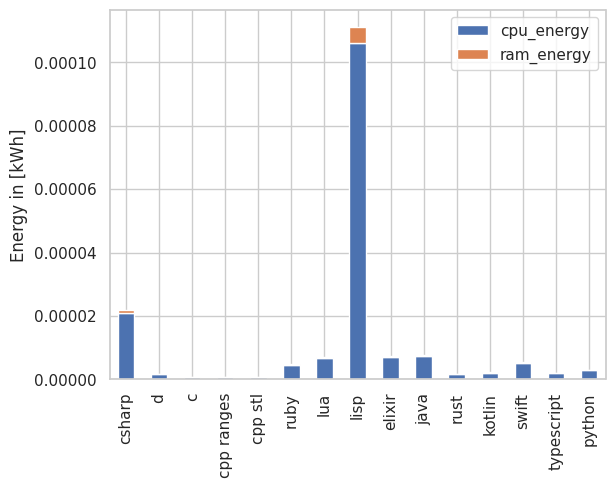

In [5]:
ax = df2.plot.bar(stacked=True)
plt.ylabel("Energy in [kWh]")
plt.xlabel("")
#ax.bar_label(ax.containers[0])

In [6]:
df2

,cpu_energy,ram_energy
project_name,,
csharp,2.094187e-05,9.979831e-07
d,1.532172e-06,7.090683e-08
c,8.065431e-07,3.304444e-08
cpp ranges,7.795707e-07,3.181431e-08
cpp stl,7.553645e-07,3.439971e-08
ruby,4.562393e-06,2.160797e-07
lua,6.857637e-06,3.254516e-07
lisp,1.060216e-04,5.059325e-06
elixir,7.051058e-06,3.303415e-07


In [7]:
df2["total_energy"] = df2.cpu_energy + df2.ram_energy

In [8]:
df2

,cpu_energy,ram_energy,total_energy
project_name,,,
csharp,2.094187e-05,9.979831e-07,2.193985e-05
d,1.532172e-06,7.090683e-08,1.603079e-06
c,8.065431e-07,3.304444e-08,8.395876e-07
cpp ranges,7.795707e-07,3.181431e-08,8.113850e-07
cpp stl,7.553645e-07,3.439971e-08,7.897642e-07
ruby,4.562393e-06,2.160797e-07,4.778472e-06
lua,6.857637e-06,3.254516e-07,7.183089e-06
lisp,1.060216e-04,5.059325e-06,1.110809e-04
elixir,7.051058e-06,3.303415e-07,7.381399e-06


In [9]:
df2.sort_values("total_energy", ascending=False)

,cpu_energy,ram_energy,total_energy
project_name,,,
lisp,1.060216e-04,5.059325e-06,1.110809e-04
csharp,2.094187e-05,9.979831e-07,2.193985e-05
java,7.464347e-06,3.520703e-07,7.816417e-06
elixir,7.051058e-06,3.303415e-07,7.381399e-06
lua,6.857637e-06,3.254516e-07,7.183089e-06
swift,5.199528e-06,2.465276e-07,5.446056e-06
ruby,4.562393e-06,2.160797e-07,4.778472e-06
python,2.852581e-06,1.344883e-07,2.987069e-06
kotlin,2.140714e-06,1.006543e-07,2.241368e-06


In [10]:
min_val = df2.total_energy.min()
df2["normed_total_energy"] = df2.total_energy / min_val

In [31]:
df2

,cpu_energy,ram_energy,total_energy,normed_total_energy
project_name,,,,
csharp,2.094187e-05,9.979831e-07,2.193985e-05,27.780257
d,1.532172e-06,7.090683e-08,1.603079e-06,2.029820
c,8.065431e-07,3.304444e-08,8.395876e-07,1.063086
cpp ranges,7.795707e-07,3.181431e-08,8.113850e-07,1.027376
cpp stl,7.553645e-07,3.439971e-08,7.897642e-07,1.000000
ruby,4.562393e-06,2.160797e-07,4.778472e-06,6.050505
lua,6.857637e-06,3.254516e-07,7.183089e-06,9.095232
lisp,1.060216e-04,5.059325e-06,1.110809e-04,140.650699
elixir,7.051058e-06,3.303415e-07,7.381399e-06,9.346333


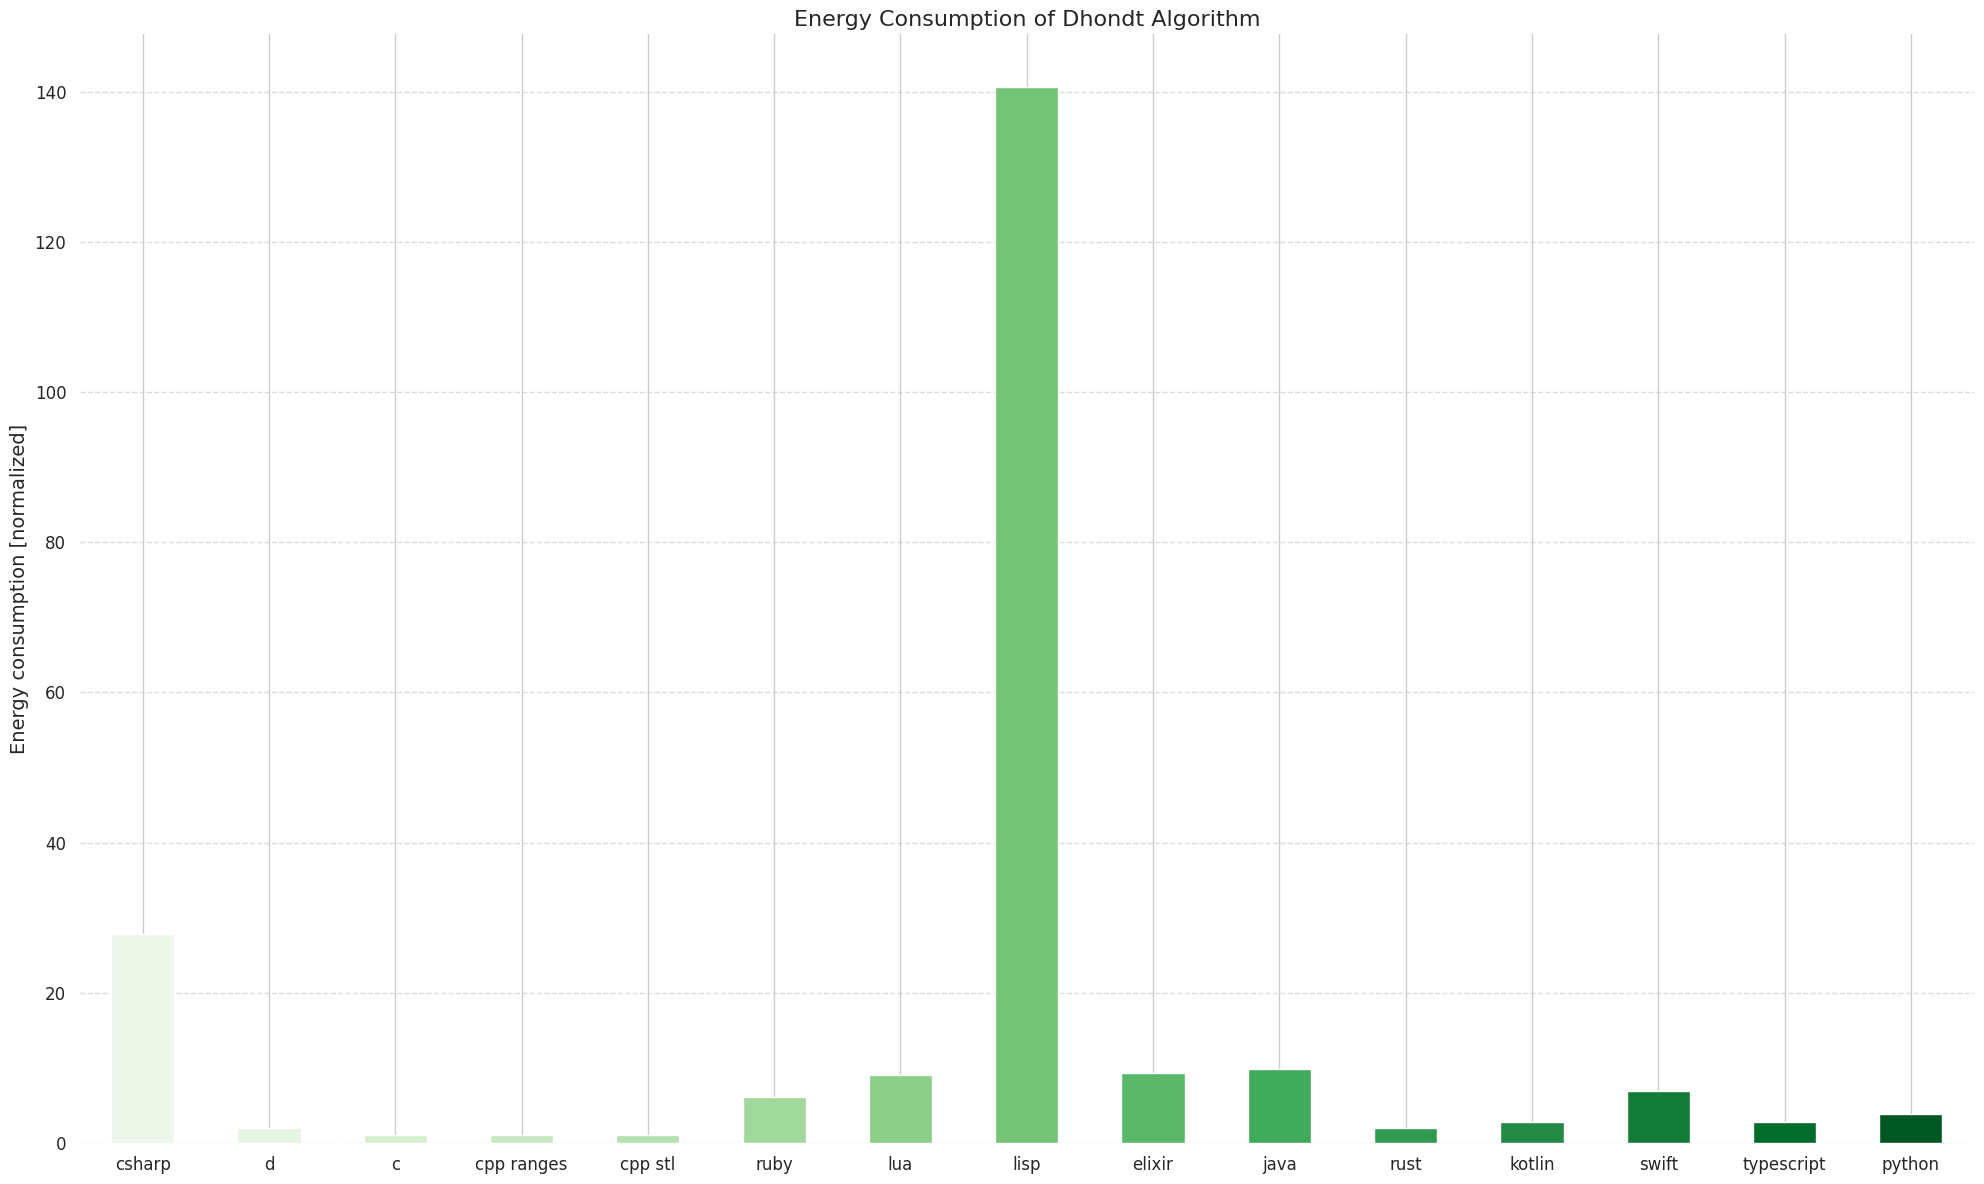

In [30]:
sns.set(style="whitegrid")
palette = sns.color_palette("Greens", n_colors=len(df2["normed_total_energy"]))
norm = plt.Normalize(df2["normed_total_energy"].min(), df2["normed_total_energy"].max())
colors = plt.cm.Greens(norm(df2["normed_total_energy"].values))
ax = df2["normed_total_energy"].plot(kind='bar', stacked=True, color=palette, figsize=(20,12))

# Customizations
plt.ylabel("Energy consumption [normalized]", fontsize=14)
plt.xlabel("", fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Energy Consumption of Dhondt Algorithm", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove spines
sns.despine(left=True, bottom=True)

# Show plot
plt.tight_layout()
plt.show()

In [43]:
def highlight_max(s):
    '''
    Highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: lightgreen' if v else '' for v in is_max]

styled_df = (df2[["normed_total_energy"]].style
             .format(precision=2, na_rep='MISSING')
             .apply(highlight_max)
             .set_caption("Energy Consumption in kWh")
             .set_properties(**{'background-color': 'white', 'color': 'black', 'border-color': 'black'})
             .set_table_styles([{
                 'selector': 'caption',
                 'props': [
                     ('color', 'black'),
                     ('font-size', '16px'),
                     ('text-align', 'center')
                 ]
             }, {
                 'selector': 'th',
                 'props': [
                     ('background-color', 'darkgreen'),
                     ('color', 'white'),
                     ('font-size', '14px')
                 ]
             }, {
                 'selector': 'td',
                 'props': [
                     ('font-size', '12px')
                 ]
             }])
            )

# Display styled DataFrame
styled_df

,normed_total_energy
project_name,
csharp,27.78
d,2.03
c,1.06
cpp ranges,1.03
cpp stl,1.00
ruby,6.05
lua,9.10
lisp,140.65
elixir,9.35
